### 3/21/17

When baking the chamber we measured the waist and relative power in the sidebands. Calculations below.

### Sidebands

### 493nm

<IPython.core.display.Javascript object>


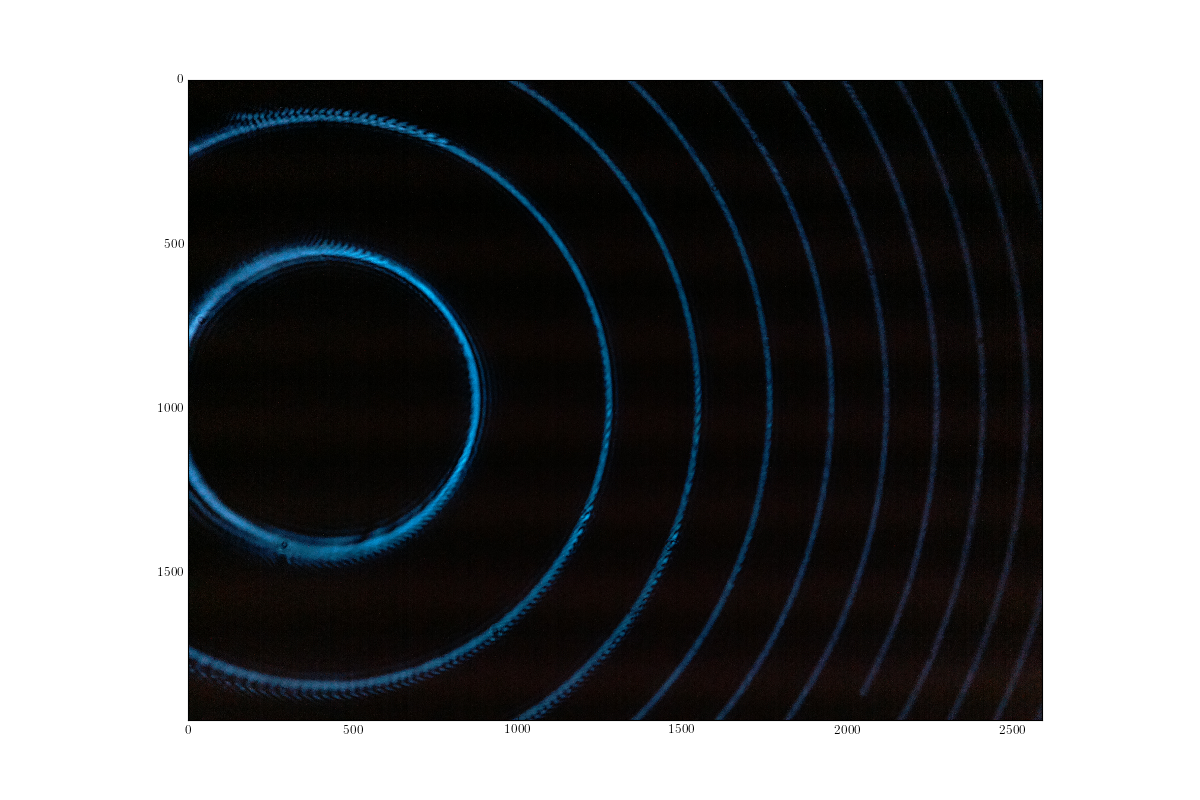

In [1]:
# Read in the etalon images and convert to matrices. 
from PIL import Image
% matplotlib notebook
rcParams["figure.figsize"] = 15, 10
carrier = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/carrier.png')

fourG = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/4GHz.png')
sixG = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/6GHz.png')
both = Image.open('Z:/Group_Share/Barium/Data/etalon_image/493/both.png')


carrier = np.array(carrier)
fourG = np.array(fourG)
sixG = np.array(sixG)
both = np.array(both)

imshow(carrier)

<IPython.core.display.Javascript object>


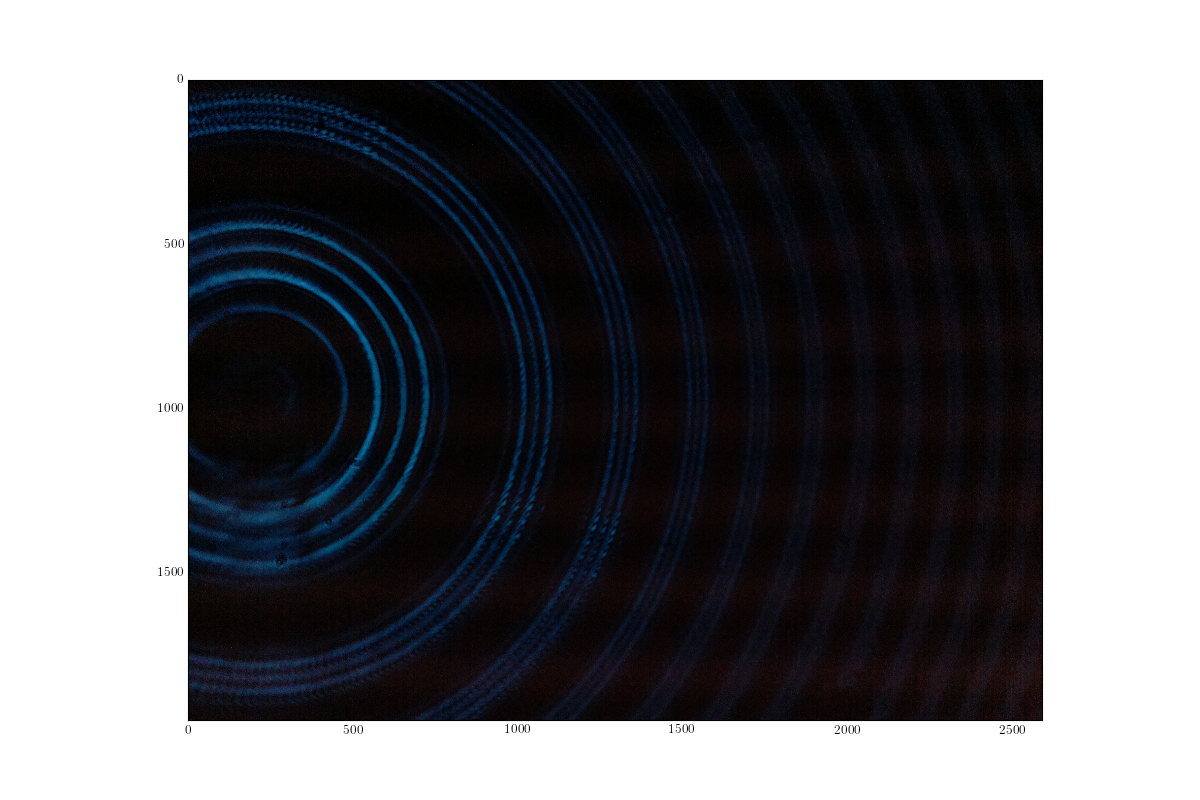

In [42]:
imshow(sixG)

<IPython.core.display.Javascript object>


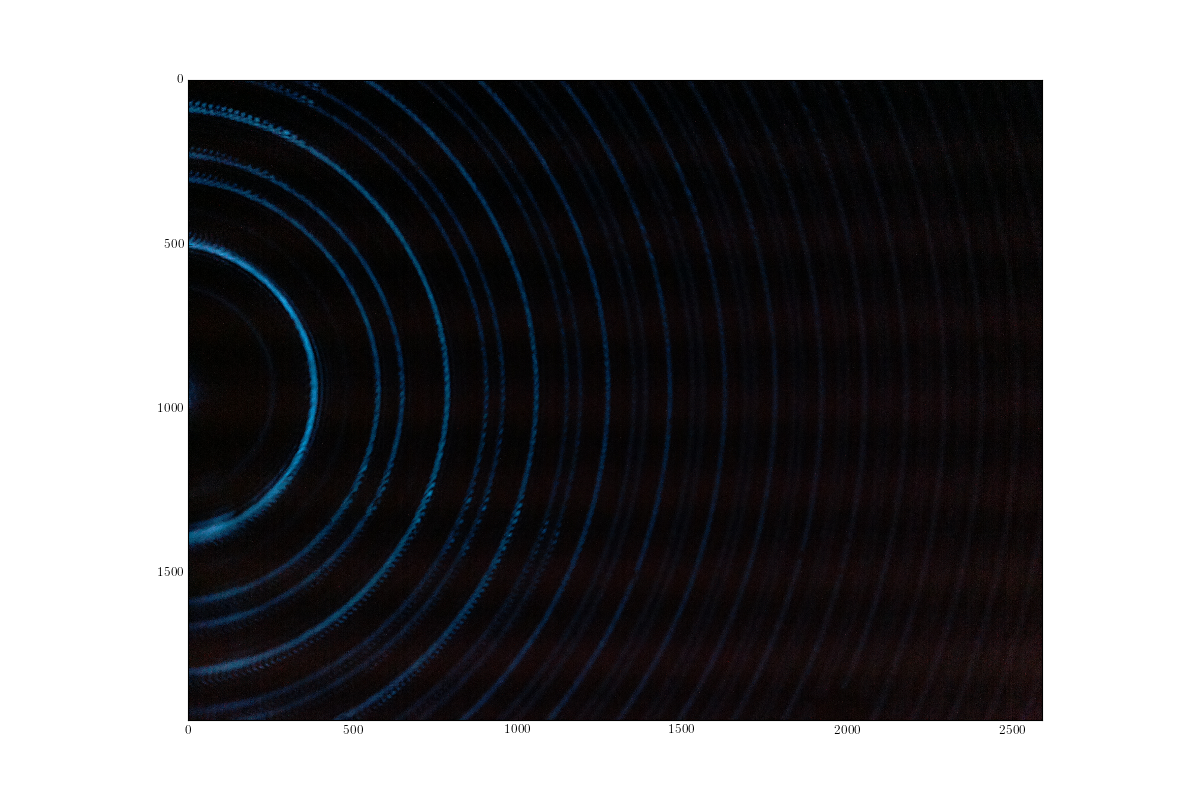

In [43]:
imshow(fourG)

<IPython.core.display.Javascript object>


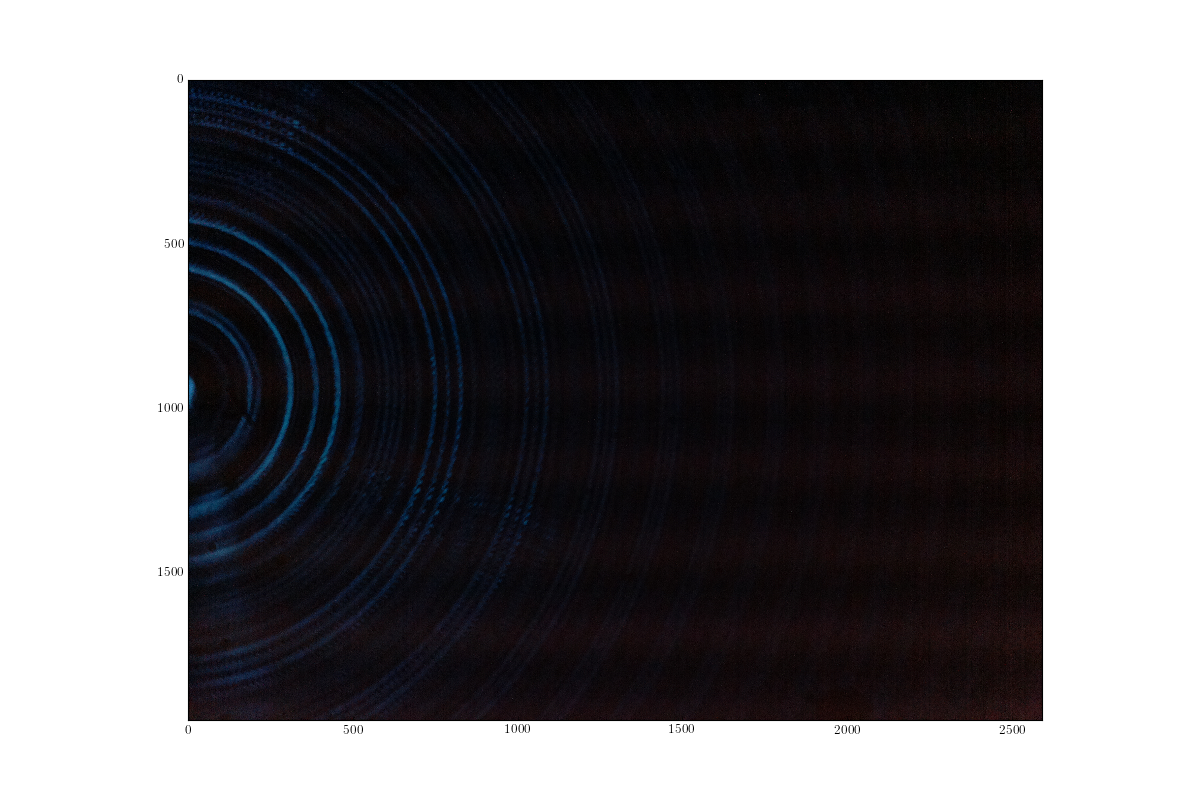

In [44]:
imshow(both)

<IPython.core.display.Javascript object>


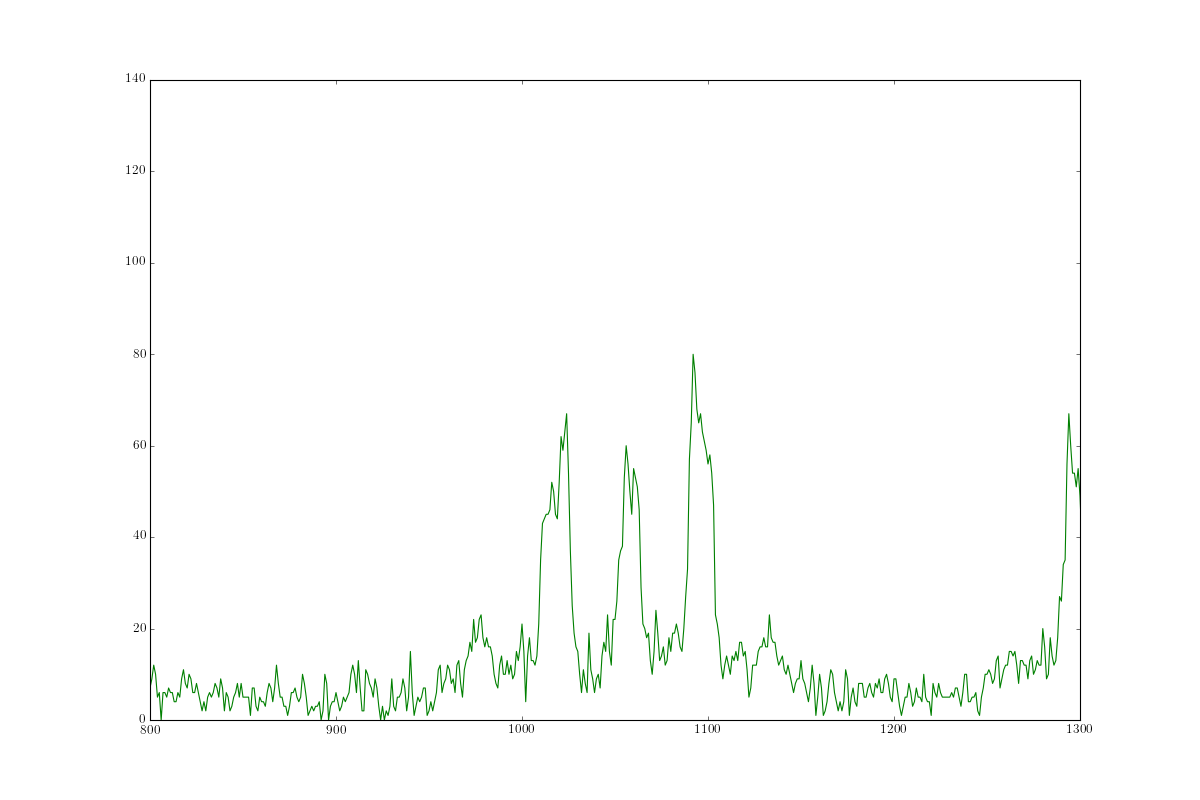

In [45]:
# make a plot of the rgb values vs  x pixels at y = 1000, basically horizontal cut 
#%matplotlib notebook

x, y, z =  carrier.shape


xdata = np.linspace(0,y-1,y)
ydata_r = carrier[1000,:,0]
ydata_g = carrier[1000,:,1]
ydata_b = carrier[1000,:,2]


#print ydata_r[1750:1900]

#plot(xdata,ydata_b, color = 'b')
#plot(xdata,ydata_b, color = 'b')

x, y, z =  sixG.shape


xdata_s = np.linspace(0,y-1,y)
ydata_r_s = sixG[1000,:,0]
ydata_g_s = sixG[1000,:,1]
ydata_b_s = sixG[1000,:,2]


plot(xdata,ydata_b_s, color = 'g')
#plot(xdata,ydata_b, color = 'b')

x, y, z =  fourG.shape


xdata_f = np.linspace(0,y-1,y)
ydata_r_f = fourG[1000,:,0]
ydata_g_f = fourG[1000,:,1]
ydata_b_f = fourG[1000,:,2]


#print ydata_r[1750:1900]
save_data = np.column_stack((xdata_s,ydata_b_s))
np.savetxt('Z:/Group_Share/Barium/Data/etalon_image/493/6GHz_data.txt',save_data, delimiter = ',')
#plot(xdata_s,ydata_b_f, color = 'g')
#plot(xdata,ydata_b, color = 'b')
xlim([800,1300])
show()


In [46]:
print "493nm Relative Power"
print "Carrier ~ ", '{:0.2f}'.format(60./(67+24+60+80+23))
print "5.8GHz 1st sideband ~ ", '{:0.2f}'.format(67./(67+24+60+80+23))
print "5.8GHz 2nd sideband ~ ",  '{:0.2f}'.format(23./(67+24+60+80+23))


493nm Relative Power
Carrier ~  0.24
5.8GHz 1st sideband ~  0.26
5.8GHz 2nd sideband ~  0.09


In [2]:
# Look at analytic formulat for sidebands. Find angles of transmission for fixed frequency

m  = 93807
n = 1.55
c = 2.99792458e8
d = 14935.e-6
f = 607.426010e12


print np.sqrt(n**2-1)*2*d*f/c
print n*2*d*f/c

print np.sqrt(n**2-(m*c/2/d/f)**2),(m*c/2/d/f)**2
angle = np.arcsin(np.sqrt(n**2-(m*c/2/d/f)**2))
print angle

71673.6198856
93807.9407054
0.00694148869406 2.40245181573
0.00694154444036


1.5707963267948966

### Saturation Intensity


In [3]:
# Calculate the saturation intensity and the saturation param for our beam
c = 2.99792458e8
f_493 = 607.425000e12
f_650 = 461.311700e12
f_585 = 512.002000e12
f_455 = 658.119000e12
f_614 = 487.989000e12

h = 6.63e-34
lam_493 = c/f_493
lam_650 = c/f_650
lam_585 = c/f_585
lam_455 = c/f_455
lam_614 = c/f_614

g_493 = 2*np.pi*15.2e6
g_650 = 2*np.pi*4.9e6
g_585 = 2*np.pi*0.7e6
g_455 = 2*np.pi*18.8e6
g_614 = 2*np.pi*5.9e6

gamma_p32 = (g_455 + g_585 + g_614)
gamma_p12 = g_455 + g_650

Isat_493 = gamma_p12**2*pi*h*c/3/lam_493**3/g_493*1e-3 # mW/mm^2
Isat_650 = gamma_p12**2*pi*h*c/3/lam_650**3/g_650*1e-3 # mW/mm^2
Isat_585 = gamma_p32**2*pi*h*c/3/lam_585**3/g_585*1e-3 # mW/mm^2
Isat_455 = gamma_p32**2*pi*h*c/3/lam_455**3/g_455*1e-3 # mW/mm^2
Isat_614 = gamma_p32**2*pi*h*c/3/lam_614**3/g_614*1e-3 # mW/mm^2

print 'Isat 493nm mW/mm^2 ', '{:.3f}'.format(Isat_493)
print 'Isat 650nm mW/mm^2', '{:.3f}'.format(Isat_650)
print 'Isat 585nm mW/mm^2', '{:.3f}'.format(Isat_585)
print 'Isat 455nm mW/mm^2', '{:.3f}'.format(Isat_455)
print 'Isat 614nm mW/mm^2', '{:.3f}'.format(Isat_614)

r_493 = 50.e-3 # mm
r_650 = 200.e-3 # mm
r_585 = 75.e-3 # mm
r_455 = 200.e-3 # mm
r_614 = 50.e-3 # mm

p_493 = 30.e-3 # mW
p_650 = .3 # mW
p_585 = 1.e-3 # mW
p_455 = 1.e-3 # mW
p_614 = 0.6e-3 # mW

I_493 = p_493/pi/r_493**2
I_650 = p_650/pi/r_650**2
I_585 = p_585/pi/r_585**2
I_455 = p_455/pi/r_455**2
I_614 = p_614/pi/r_614**2



S_493 = I_493/Isat_493
S_650 = I_650/Isat_650
S_585 = I_585/Isat_585
S_455 = I_455/Isat_455
S_614 = I_614/Isat_614

print 'S 493nm ', '{:.2f}'.format(S_493)
print 'S 650nm ', '{:.2f}'.format(S_650)
print 'S 585nm ', '{:.2f}'.format(S_585)
print 'S 455nm ', '{:.2f}'.format(S_455)
print 'S 614nm ', '{:.2f}'.format(S_614)

fwhm_493 =  gamma_p12/np.pi/2*np.sqrt(1+S_493)
fwhm_650 =  gamma_p12/np.pi/2**np.sqrt(1+S_650)
fwhm_585 =  gamma_p32/np.pi/2*np.sqrt(1+S_585)
fwhm_455 =  gamma_p32/np.pi/2*np.sqrt(1+S_455)
fwhm_614 =  gamma_p32/np.pi/2*np.sqrt(1+S_614)

print 'FWHM 493nm ', '{:.1f}'.format(fwhm_493/1e6) # MHz
print 'FWHM 650nm ', '{:.1f}'.format(fwhm_650/1e6) # MHz
print 'FWHM 585nm ', '{:.1f}'.format(fwhm_585/1e6) # MHz
print 'FWHM 455nm ', '{:.1f}'.format(fwhm_455/1e6) # MHz
print 'FWHM 614nm ', '{:.1f}'.format(fwhm_614/1e6) # MHz

Isat 493nm mW/mm^2  0.402
Isat 650nm mW/mm^2 0.546
Isat 585nm mW/mm^2 6.004
Isat 455nm mW/mm^2 0.475
Isat 614nm mW/mm^2 0.617
S 493nm  9.50
S 650nm  4.37
S 585nm  0.01
S 455nm  0.02
S 614nm  0.12
FWHM 493nm  76.8
FWHM 650nm  9.5
FWHM 585nm  25.5
FWHM 455nm  25.6
FWHM 614nm  26.9
